# Best parameters research

This code aimed to choose the best number of epochs, the best latent space dimension, and the best way to visualize it. Note that the figures of the report were generated from this code but with the real data, that are confidential. The figures shown in this notebook now are the same as the ones in the report for the visualization, but if you want to run this code again, you will have to use the fake data and thus get different figures (ready to run).

In [1]:
#Importations
from keras import backend as K
from keras import losses
from keras.layers import Input, LSTM, Dense, Lambda, TimeDistributed, Masking
from keras.models import Model
import pickle
from src.ml.samplers.final_utils import *
from tensorflow.python.framework.ops import disable_eager_execution
import numpy as np
import matplotlib.pyplot as plt
disable_eager_execution()
from sklearn.manifold import TSNE

In [2]:
initial_data, max_nb_clicks, num_encoder_clicks, input_clicks, inverse_clicks_dict, click_dict, input_data, decoder_input_data = get_text_data()

Number of samples: 254
Number of unique input click types: 22
Max number of clicks for one student: 819


In [362]:
#Creation and training of the model
one_hot_train = input_data[:192,:] 
decoder_input_train = decoder_input_data[:192,:]
one_hot_validation = input_data[192:224,:] 
decoder_input_validation = decoder_input_data[192:224,:]
one_hot_test = input_data[-32:,:]
decoder_input_test = decoder_input_data[-32:,:]

input_dim=23
batch_size = 1
intermediate_dim = 64
latent_dim = 2
num_epochs = 500

#Creation of the model
vae, encoder, generator, stepper = create_lstm_vae_(input_dim, batch_size, intermediate_dim, latent_dim)

#Model fitting
history = vae.fit(x=[one_hot_train, decoder_input_train], y=one_hot_train,
        batch_size=batch_size, 
        epochs=num_epochs, verbose=1, validation_data = ([one_hot_validation,decoder_input_validation], one_hot_validation))

epsilon: Tensor("lambda_33/random_normal:0", shape=(32, 2), dtype=float32)
Model: "model_132"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_166 (InputLayer)      [(None, None, 23)]           0         []                            
                                                                                                  
 lstm_66 (LSTM)              (None, 64)                   22528     ['input_166[0][0]']           
                                                                                                  
 dense_132 (Dense)           (None, 2)                    130       ['lstm_66[0][0]']             
                                                                                                  
 dense_133 (Dense)           (None, 2)                    130       ['lstm_66[0][0]']             
               

2023-12-15 12:56:31.165153: W tensorflow/c/c_api.cc:305] Operation '{name:'training_66/Adam/dense_134/kernel/v/Assign' id:57523 op device:{requested: '', assigned: ''} def:{{{node training_66/Adam/dense_134/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_66/Adam/dense_134/kernel/v, training_66/Adam/dense_134/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


192/192 [==============================] - ETA: 0s - loss: 0.3765

/Users/valentinedelevaux/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-12-15 12:56:34.999751: W tensorflow/c/c_api.cc:305] Operation '{name:'loss_33/mul' id:57053 op device:{requested: '', assigned: ''} def:{{{node loss_33/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_33/mul/x, loss_33/time_distributed_33_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


192/192 [==============================] - 8s 41ms/sample - loss: 0.3765 - val_loss: 0.4662
Epoch 2/120
192/192 [==============================] - 1s 8ms/sample - loss: 0.3659 - val_loss: 0.4505
Epoch 3/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.3520 - val_loss: 0.4262
Epoch 4/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.3287 - val_loss: 0.3934
Epoch 5/120
192/192 [==============================] - 1s 8ms/sample - loss: 0.3100 - val_loss: 0.3695
Epoch 6/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.2941 - val_loss: 0.3537
Epoch 7/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.2814 - val_loss: 0.3396
Epoch 8/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.2701 - val_loss: 0.3247
Epoch 9/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.2603 - val_loss: 0.3138
Epoch 10/120
192/192 [==============================] - 1s 7ms/sample - loss: 0.2525

/Users/valentinedelevaux/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-12-15 12:59:52.476007: W tensorflow/c/c_api.cc:305] Operation '{name:'time_distributed_33/Reshape_1' id:56586 op device:{requested: '', assigned: ''} def:{{{node time_distributed_33/Reshape_1}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _has_manual_control_dependencies=true](time_distributed_33/dense_135/Softmax, time_distributed_33/Reshape_1/shape)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


The accuracy of the model is 56.048703849175176 %
Accuracy: 56.048703849175176 %


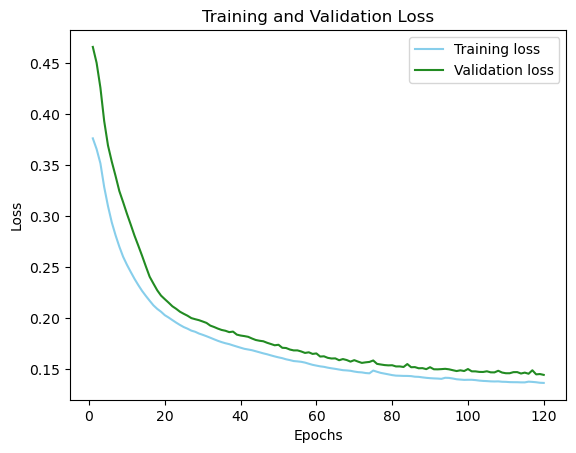

In [363]:
#Model testing
reconstruction = vae.predict([one_hot_test, decoder_input_test])

accuracy=new_accuracy(one_hot_test, reformate_(one_hot_test, reconstruction))
print("Accuracy:", accuracy, "%")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'skyblue', label='Training loss')
plt.plot(epochs, val_loss, 'forestgreen', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [364]:
seed_sequence=input_data
z_mean, z_log_sigma = encoder.predict(seed_sequence)
epsilon = np.random.normal(size = z_mean.shape)
latent_state = z_mean + np.exp(0.5 * z_log_sigma) * epsilon

2023-12-15 12:59:58.121603: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_132/BiasAdd' id:56259 op device:{requested: '', assigned: ''} def:{{{node dense_132/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_132/MatMul, dense_132/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [ ]:
def find_indices():

    lst_germano = []
    lst_franco = []
    lst_pass = []
    lst_fail = []
    lst_germano_pass = []
    lst_germano_fail = []
    lst_franco_pass = []
    lst_franco_fail = []

    
    with open('./data/ml4science_data_fake.pkl', 'rb') as file:
        data = pickle.load(file)

    for i in range(len(data['sequences'])):
        language = data['sequences'][i]['language']
        perf = data['sequences'][i]['label']
        if language == 'Deutsch':
            lst_germano.append(i)
            if perf == 0:
                lst_germano_fail.append(i)
            if perf == 1:
                lst_germano_pass.append(i)
        if language == 'Français':
            lst_franco.append(i)
            if perf == 0:
                lst_franco_fail.append(i)
            if perf ==1:
                lst_franco_pass.append(i)
        if perf == 0:
            lst_fail.append(i)
        if perf == 1:
            lst_pass.append(i)
            

    return lst_germano, lst_franco, lst_pass, lst_fail, lst_germano_pass, lst_germano_fail, lst_franco_fail, lst_franco_pass

lst_germano, lst_franco, lst_pass, lst_fail, lst_germano_pass, lst_germano_fail, lst_franco_fail, lst_franco_pass = find_indices()

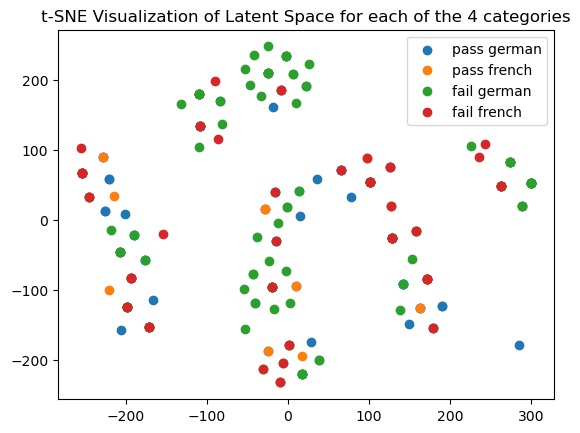

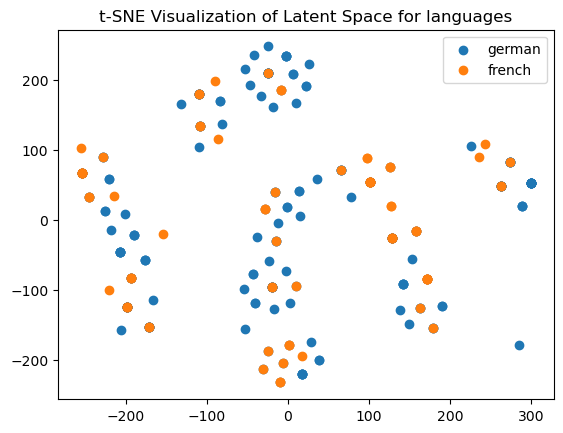

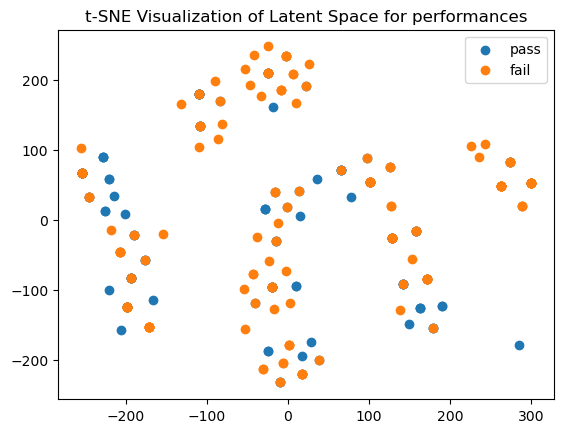

In [379]:
#t-SNE only on z_mean for latent space visualization
tsne = TSNE(n_components=2, random_state=42)
latent_mean_tsne = tsne.fit_transform(z_mean)

# Scatter plots
latent_tsne_pg= latent_mean_tsne[lst_germano_pass]
latent_tsne_pf= latent_mean_tsne[lst_franco_pass]
latent_tsne_fg= latent_mean_tsne[lst_germano_fail]
latent_tsne_ff= latent_mean_tsne[lst_franco_fail]

latent_tsne_german=np.concatenate((latent_tsne_pg,latent_tsne_fg))
latent_tsne_french=np.concatenate((latent_tsne_pf,latent_tsne_ff))

latent_tsne_pass= latent_mean_tsne[lst_pass]
latent_tsne_fail= latent_mean_tsne[lst_fail]

#For 4 categories
plt.scatter(latent_tsne_pg[:, 0], latent_tsne_pg[:, 1], label="pass german")
plt.scatter(latent_tsne_pf[:, 0], latent_tsne_pf[:, 1], label="pass french")
plt.scatter(latent_tsne_fg[:, 0], latent_tsne_fg[:, 1], label="fail german")
plt.scatter(latent_tsne_ff[:, 0], latent_tsne_ff[:, 1], label="fail french")
plt.title('t-SNE Visualization of Latent Space for each of the 4 categories')
plt.legend()
plt.show()

#For languages
plt.scatter(latent_tsne_german[:, 0], latent_tsne_german[:, 1], label="german")
plt.scatter(latent_tsne_french[:, 0], latent_tsne_french[:, 1], label="french")
plt.title('t-SNE Visualization of Latent Space for languages')
plt.legend()
plt.show()

#For performances
plt.scatter(latent_tsne_pass[:, 0], latent_tsne_pass[:, 1], label="pass")
plt.scatter(latent_tsne_fail[:, 0], latent_tsne_fail[:, 1], label="fail")
plt.title('t-SNE Visualization of Latent Space for performances')
plt.legend()
plt.show()

In [373]:
#Saving of the model (optional)
vae.save('model_vae_latent_visualization.h5')
generator.save_weights('generator_weights_latent_visualization.h5')
encoder.save_weights('encoder_weights_latent_visualization.h5')